**Import all necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import urllib.request
import requests
import cv2
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

**Load the CIFAR 10 data**

In [ ]:
from tensorflow.keras import datasets

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

**Shape of all the train and test variables**

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
X_train[12].shape

(32, 32, 3)

array([[[164, 215, 244],
        [162, 212, 240],
        [162, 212, 240],
        ...,
        [157, 210, 237],
        [153, 208, 235],
        [153, 203, 234]],

       [[168, 218, 245],
        [166, 215, 242],
        [166, 215, 242],
        ...,
        [164, 212, 238],
        [160, 209, 236],
        [158, 205, 235]],

       [[172, 220, 246],
        [170, 217, 243],
        [171, 218, 244],
        ...,
        [168, 212, 238],
        [165, 208, 235],
        [163, 207, 236]],

       ...,

       [[123, 160, 105],
        [117, 154, 102],
        [112, 149,  99],
        ...,
        [117, 136, 100],
        [ 95, 115,  79],
        [120, 149, 100]],

       [[120, 156, 100],
        [116, 151,  99],
        [112, 147,  96],
        ...,
        [126, 149, 110],
        [120, 144, 103],
        [120, 152, 101]],

       [[121, 154,  96],
        [120, 152,  99],
        [116, 148,  97],
        ...,
        [124, 152, 108],
        [124, 154, 107],
        [120, 154, 100]]], dtype=uint8)
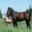

In [ ]:
X_train[12]

**We are trying to visualize different classes in the dataset to better understand of the data**

In [ ]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(class_names[y[index].item()])
    plt.show()

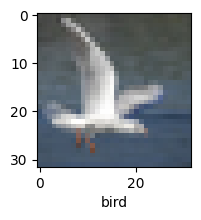

In [ ]:
plot_sample(X_test, y_test, 2542)

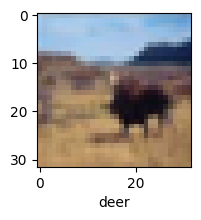

In [ ]:
plot_sample(X_test, y_test, 165)

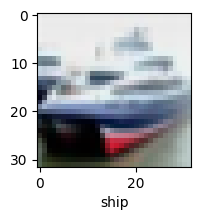

In [ ]:
plot_sample(X_test, y_test, 1)

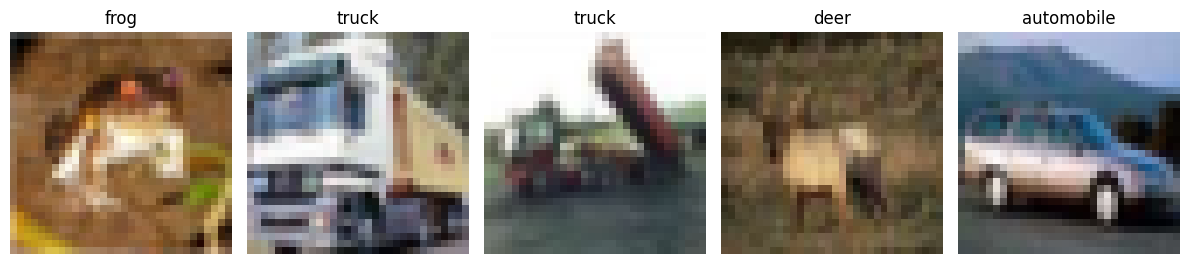

In [ ]:
# Step 6: Visualize a few samples
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.tight_layout()
plt.show()


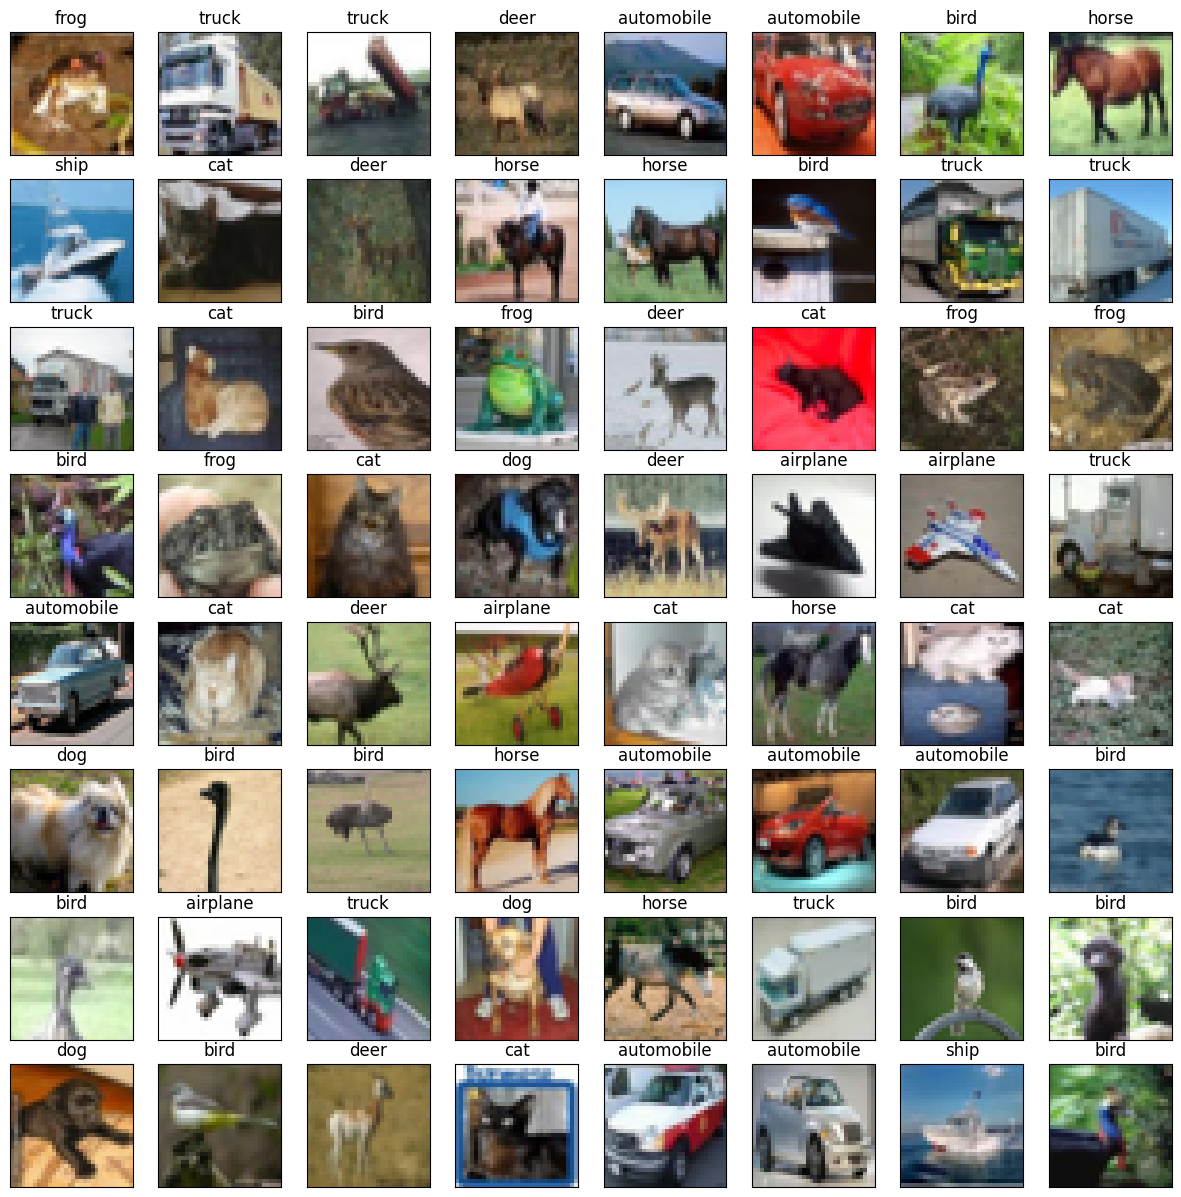

In [ ]:
# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a new figure
plt.figure(figsize=(15,15))

# Loop over the first 25 images
for i in range(64):
    # Create a subplot for each image
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(x_train[i])

    # Set the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=12)

# Display the figure
plt.show()

# **Histograms, heatmaps to illustrate the data.**


<ipython-input-63-7c11911f18a4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_dist, x='Class', y='Count', palette='Set2')


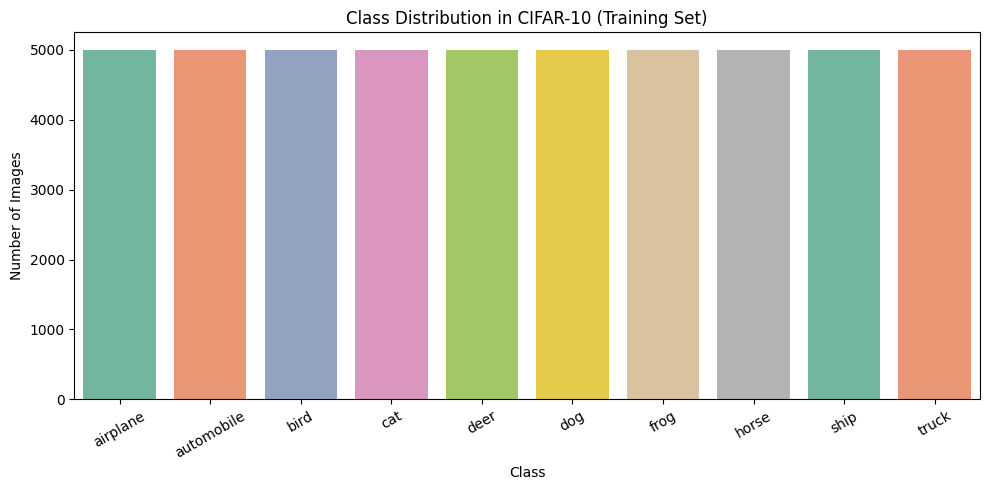

In [ ]:
# Step 1: Class Distribution Bar Chart
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
counts = np.bincount(y_train.flatten())

df_dist = pd.DataFrame({
    'Class': class_names,
    'Count': counts
})

plt.figure(figsize=(10, 5))
sns.barplot(data=df_dist, x='Class', y='Count', palette='Set2')
plt.title('Class Distribution in CIFAR-10 (Training Set)')
plt.xticks(rotation=30)
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Class Distribution Bar Chart
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
counts = np.bincount(y_train.flatten())

df_dist = pd.DataFrame({
    'Class': class_names,
    'Count': counts
})


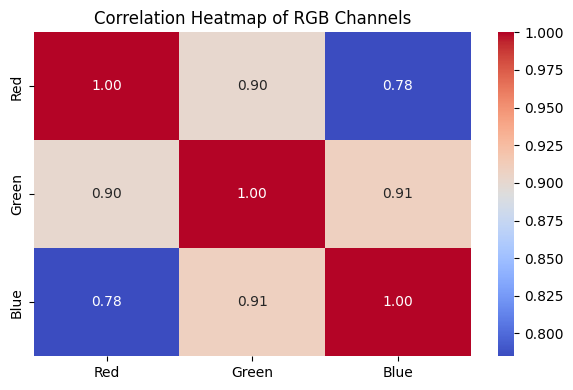

In [ ]:
# Step 2: RGB Channel Correlation
x_sample = x_train[:1000]
r = x_sample[:, :, :, 0].flatten()
g = x_sample[:, :, :, 1].flatten()
b = x_sample[:, :, :, 2].flatten()
df_rgb = pd.DataFrame({'Red': r, 'Green': g, 'Blue': b})

plt.figure(figsize=(6, 4))
sns.heatmap(df_rgb.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of RGB Channels")
plt.tight_layout()
plt.show()


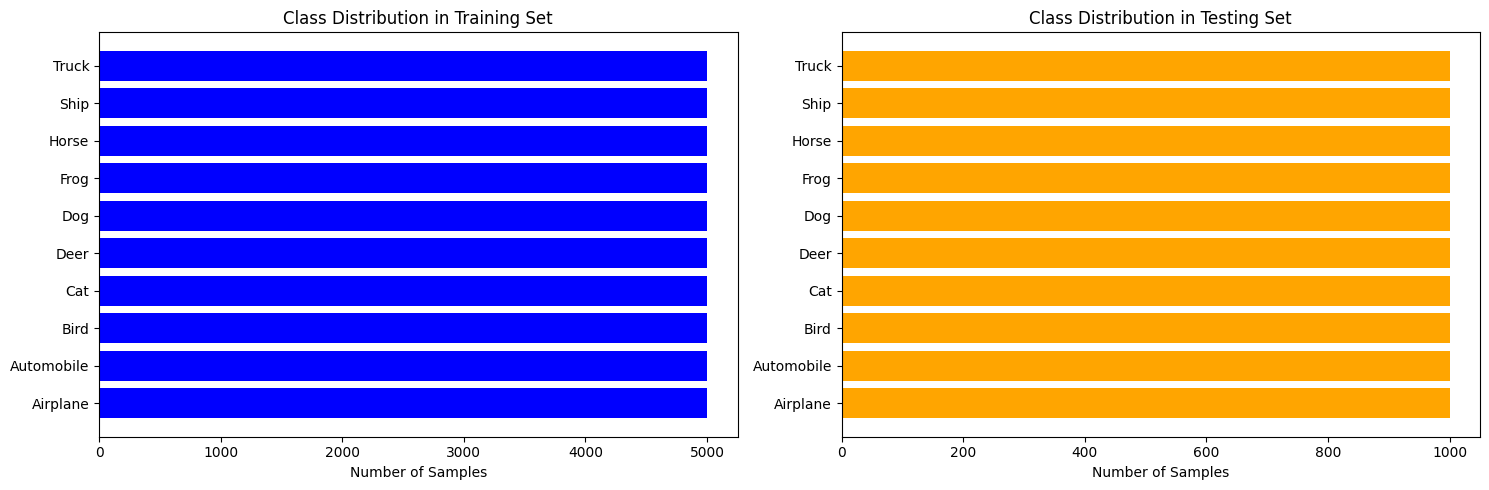

In [ ]:
# Define class names
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Get class distribution for training and testing sets
train_classes, train_counts = np.unique(y_train, return_counts=True)
test_classes, test_counts = np.unique(y_test, return_counts=True)

# Set figure size and create subplots
plt.figure(figsize=(15, 5))

# Plot class distribution for training set
plt.subplot(1, 2, 1)
plt.barh(classes_name, train_counts, color='blue')
plt.xlabel('Number of Samples')
plt.title('Class Distribution in Training Set')

# Plot class distribution for testing set
plt.subplot(1, 2, 2)
plt.barh(classes_name, test_counts, color='orange')
plt.xlabel('Number of Samples')
plt.title('Class Distribution in Testing Set')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
!pip install scikit-image opencv-python

In [ ]:
import cv2
from skimage.feature import local_binary_pattern, hog
from skimage.color import rgb2gray
from tqdm import tqdm

# Parameters
num_images = 1000  # Use a subset for speed (you can increase later)
hog_features = []
lbp_features = []
color_hist_features = []

print("Extracting handcrafted features from {} images...".format(num_images))

for i in tqdm(range(num_images)):
    img = x_train[i]
    gray = rgb2gray(img)

    # --- HOG ---
    hog_feat = hog(gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
    hog_features.append(hog_feat)

    # --- LBP ---
    lbp = local_binary_pattern(gray, P=8, R=1, method='uniform')
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 11), range=(0, 10))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    lbp_features.append(hist)

    # --- Color Histogram ---
    chans = cv2.split(img)
    hist_feat = []
    for chan in chans:
        hist = cv2.calcHist([chan], [0], None, [16], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        hist_feat.extend(hist)
    color_hist_features.append(hist_feat)

# Convert to numpy arrays
hog_features = np.array(hog_features)
lbp_features = np.array(lbp_features)
color_hist_features = np.array(color_hist_features)

print("HOG shape:", hog_features.shape)
print("LBP shape:", lbp_features.shape)
print("Color Histogram shape:", color_hist_features.shape)

Extracting handcrafted features from 1000 images...


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
100%|██████████| 1000/1000 [00:01<00:00, 543.92it/s]

HOG shape: (1000, 324)
LBP shape: (1000, 10)
Color Histogram shape: (1000, 48)


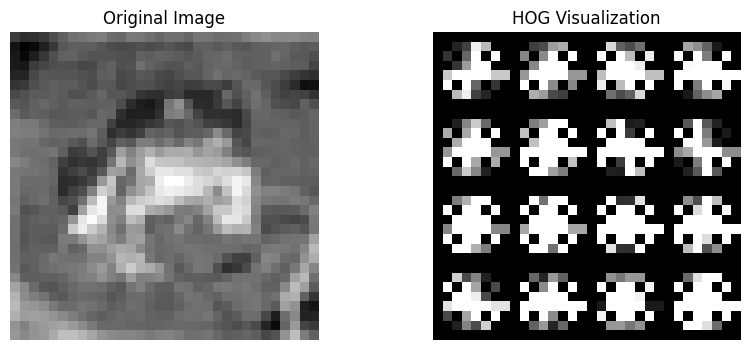

In [ ]:
from skimage import exposure

# Show image with its HOG
sample_img = rgb2gray(x_train[0])
hog_img, hog_vis = hog(sample_img, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), visualize=True, feature_vector=True)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(sample_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(exposure.rescale_intensity(hog_vis, in_range=(0, 0.02)), cmap='gray')
plt.title('HOG Visualization')
plt.axis('off')
plt.show()

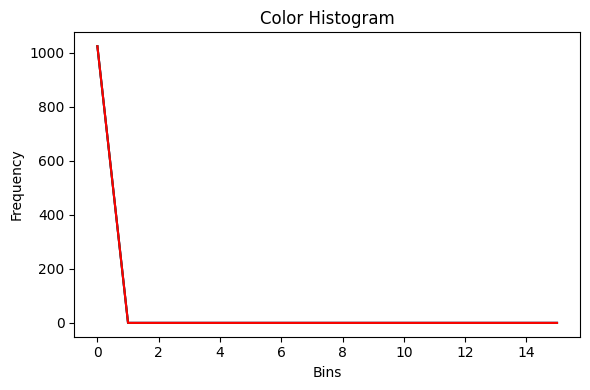

In [ ]:
# Plot color histogram for same image
colors = ('b', 'g', 'r')
plt.figure(figsize=(6, 4))
for i, color in enumerate(colors):
    hist = cv2.calcHist([x_train[0]], [i], None, [16], [0, 256])
    plt.plot(hist, color=color)
    plt.title('Color Histogram')
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from tqdm import tqdm

In [ ]:
# Resize images and preprocess for VGG/ResNet
def preprocess_for_model(images, target_size, preprocess_fn):
    resized = np.zeros((len(images), target_size, target_size, 3), dtype='float32')
    for i in range(len(images)):
        resized[i] = tf.image.resize(images[i], (target_size, target_size))
    return preprocess_fn(resized)

# Prepare subsets (same 1000 images for speed)
x_subset = x_train[:1000]
vgg_input = preprocess_for_model(x_subset, 224, vgg_preprocess)
resnet_input = preprocess_for_model(x_subset, 224, resnet_preprocess)

In [ ]:
# Load models without the final classification layers
vgg_model = VGG16(weights='imagenet', include_top=False, pooling='avg')
resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Extract features
print("Extracting VGG-16 features...")
vgg_features = vgg_model.predict(vgg_input, verbose=1)

print("Extracting ResNet-50 features...")
resnet_features = resnet_model.predict(resnet_input, verbose=1)

# Shapes
print("VGG-16 feature shape:", vgg_features.shape)
print("ResNet-50 feature shape:", resnet_features.shape)

Extracting VGG-16 features...
32/32 ━━━━━━━━━━━━━━━━━━━━ 614s 19s/step
Extracting ResNet-50 features...
16/32 ━━━━━━━━━━━━━━━━━━━━ 1:32 6s/step

In [ ]:
from sklearn.preprocessing import StandardScaler

# Combine handcrafted features
handcrafted = np.concatenate([hog_features, lbp_features, color_hist_features], axis=1)

# Combine handcrafted + deep features
hybrid_features = np.concatenate([handcrafted, vgg_features, resnet_features], axis=1)
print("Hybrid feature shape before PCA:", hybrid_features.shape)

# Normalize before PCA
scaler = StandardScaler()
hybrid_scaled = scaler.fit_transform(hybrid_features)

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 200 dimensions (tune as needed)
pca = PCA(n_components=200)
hybrid_pca = pca.fit_transform(hybrid_scaled)

print("Hybrid feature shape after PCA:", hybrid_pca.shape)

Hybrid feature shape after PCA: (1000, 200)


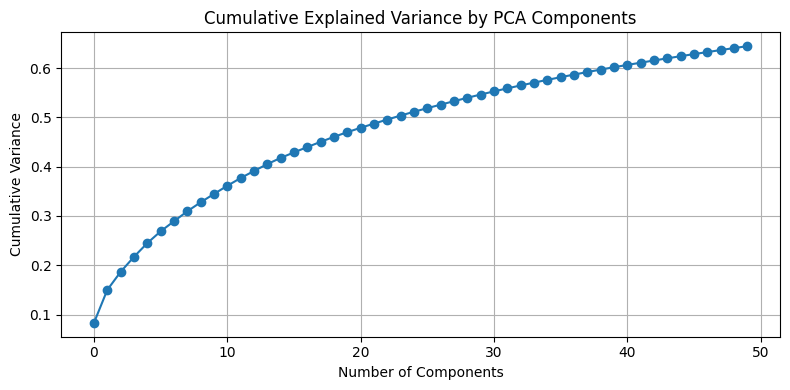

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_[:50]), marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# CIFAR-10 labels (we only used first 1000)
y_subset = y_train[:1000].flatten()

# Split the data
X_train, X_test, y_train_split, y_test_split = train_test_split(
    hybrid_pca, y_subset, test_size=0.2, random_state=42, stratify=y_subset
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

ValueError: Found input variables with inconsistent numbers of samples: [1000, 2000]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Helper function
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=0))

# k-NN
knn = KNeighborsClassifier(n_neighbors=3)
evaluate_model("k-NN (k=3)", knn, X_train, X_test, y_train_split, y_test_split)

# SVM
svm = SVC(kernel='rbf', C=10)
evaluate_model("SVM (RBF)", svm, X_train, X_test, y_train_split, y_test_split)

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
evaluate_model("Random Forest", rf, X_train, X_test, y_train_split, y_test_split)


--- k-NN (k=3) ---
Accuracy: 0.315
              precision    recall  f1-score   support

           0       0.37      0.50      0.43        20
           1       0.50      0.41      0.45        22
           2       0.20      0.35      0.25        20
           3       0.06      0.06      0.06        18
           4       0.23      0.45      0.30        20
           5       0.18      0.12      0.14        17
           6       0.31      0.41      0.35        22
           7       0.62      0.25      0.36        20
           8       0.62      0.25      0.36        20
           9       0.75      0.29      0.41        21

    accuracy                           0.32       200
   macro avg       0.39      0.31      0.31       200
weighted avg       0.39      0.32      0.32       200


--- SVM (RBF) ---
Accuracy: 0.495
              precision    recall  f1-score   support

           0       0.46      0.55      0.50        20
           1       0.38      0.59      0.46        22
       

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers except last few
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Add classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Preprocess CIFAR-10 labels
y_subset = to_categorical(y_train[:5000], num_classes=10)

# Resize input
resized = tf.image.resize(x_train[:5000], (224, 224))

# Train
model.fit(resized, y_subset, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1139s 9s/step - accuracy: 0.1632 - loss: 2.2719 - val_accuracy: 0.1010 - val_loss: 2.3660
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1162s 9s/step - accuracy: 0.2681 - loss: 1.9433 - val_accuracy: 0.1510 - val_loss: 2.3498
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1150s 9s/step - accuracy: 0.3287 - loss: 1.8102 - val_accuracy: 0.2130 - val_loss: 2.5700
Epoch 4/5
111/125 ━━━━━━━━━━━━━━━━━━━━ 1:42 7s/step - accuracy: 0.3765 - loss: 1.6844

In [ ]:
# Plot training vs validation accuracy & loss
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history.get('val_accuracy')
    loss = history.history['loss']
    val_loss = history.history.get('val_loss')
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training acc')
    plt.plot(epochs, val_acc, 'ro-', label='Validation acc')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

history = model.fit(resized, y_subset, epochs=5, batch_size=32, validation_split=0.2)

plot_training_history(history)


In [ ]:
resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
resnet_features = resnet_model.predict(resnet_input)  # shape: (1000, 2048)


32/32 ━━━━━━━━━━━━━━━━━━━━ 205s 6s/step


In [ ]:
hybrid_pca = PCA(n_components=200).fit_transform(hybrid_scaled)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train_part, y_test_part = train_test_split(
    hybrid_pca, y_subset[:1000], test_size=0.2, stratify=y_subset[:1000], random_state=42
)

clf = SVC(kernel='rbf', C=10)
clf.fit(X_train, y_train_part)
y_pred = clf.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test_part, y_pred))


SVM Accuracy: 0.49


In [ ]:
# You already did this earlier
X = resnet_features[:1000]  # shape (1000, 2048)
y = y_train[:1000].flatten()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=200)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train_split, y_test_split = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=42
)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train_split)
y_pred = logreg.predict(X_test)

print("LogReg Accuracy:", accuracy_score(y_test_split, y_pred))
print(classification_report(y_test_split, y_pred, zero_division=0))


LogReg Accuracy: 0.335
              precision    recall  f1-score   support

           0       0.29      0.25      0.27        20
           1       0.38      0.45      0.42        22
           2       0.30      0.30      0.30        20
           3       0.20      0.11      0.14        18
           4       0.24      0.25      0.24        20
           5       0.26      0.29      0.28        17
           6       0.43      0.59      0.50        22
           7       0.42      0.40      0.41        20
           8       0.28      0.25      0.26        20
           9       0.40      0.38      0.39        21

    accuracy                           0.34       200
   macro avg       0.32      0.33      0.32       200
weighted avg       0.33      0.34      0.33       200



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 90s 138ms/step - accuracy: 0.2676 - loss: 2.1042 - val_accuracy: 0.4723 - val_loss: 1.4876
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 132ms/step - accuracy: 0.4442 - loss: 1.5449 - val_accuracy: 0.5254 - val_loss: 1.3431
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 133ms/step - accuracy: 0.4983 - loss: 1.4056 - val_accuracy: 0.5815 - val_loss: 1.1705
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 129ms/step - accuracy: 0.5422 - loss: 1.2778 - val_accuracy: 0.5982 - val_loss: 1.1508
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 129ms/step - accuracy: 0.5730 - loss: 1.2044 - val_accuracy: 0.4972 - val_loss: 1.5648
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 124ms/step - accuracy: 0.5968 - loss: 1.1467 - val_accuracy: 0.6223 - val_loss: 1.0690
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 127ms/step - accuracy: 0.6152 - loss: 1.0935 - val_accuracy: 0.6187 - val_loss: 1.1688
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 128ms/step - accuracy: 0.6326 - loss

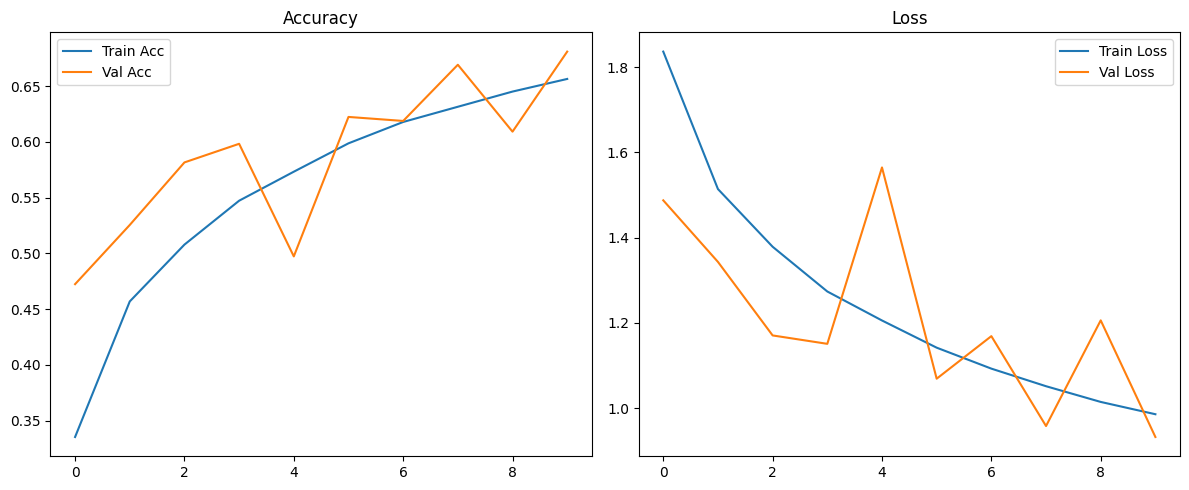

In [ ]:
# STEP 1: Install TensorFlow (if needed, Colab already has it)
# !pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Build CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print("Test Accuracy:", test_accuracy)

# Plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step


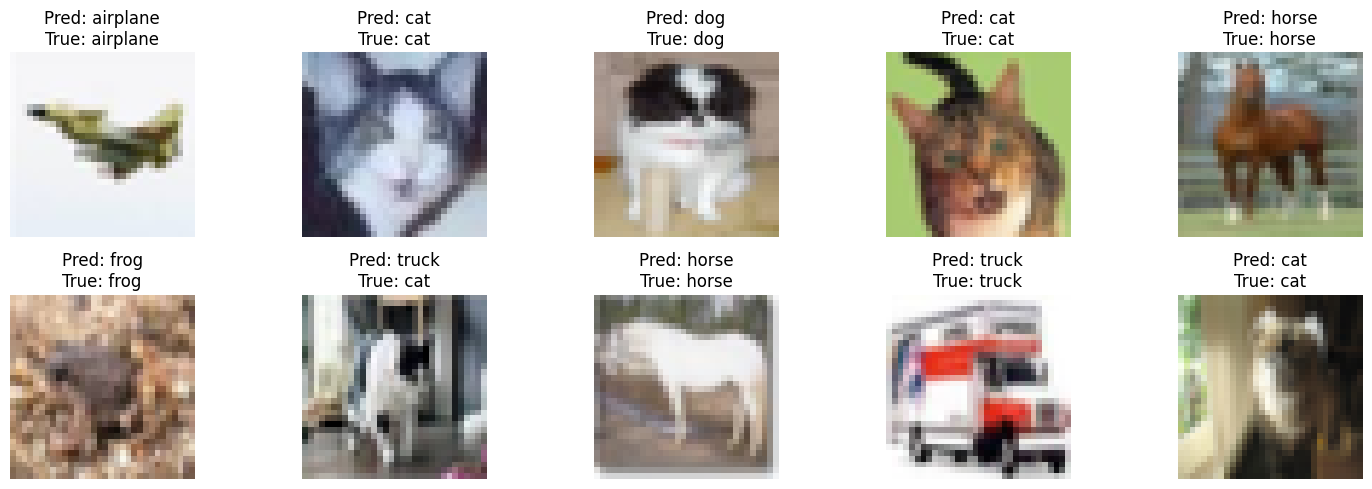

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Class labels for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Predict on test images
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = y_test.flatten()

# Display 10 random predictions
num_samples = 10
random_idxs = np.random.choice(len(x_test), num_samples, replace=False)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_idxs):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx])
    plt.title(f"Pred: {class_names[y_pred_classes[idx]]}\nTrue: {class_names[y_true_classes[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


# **Final results with all models**

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step


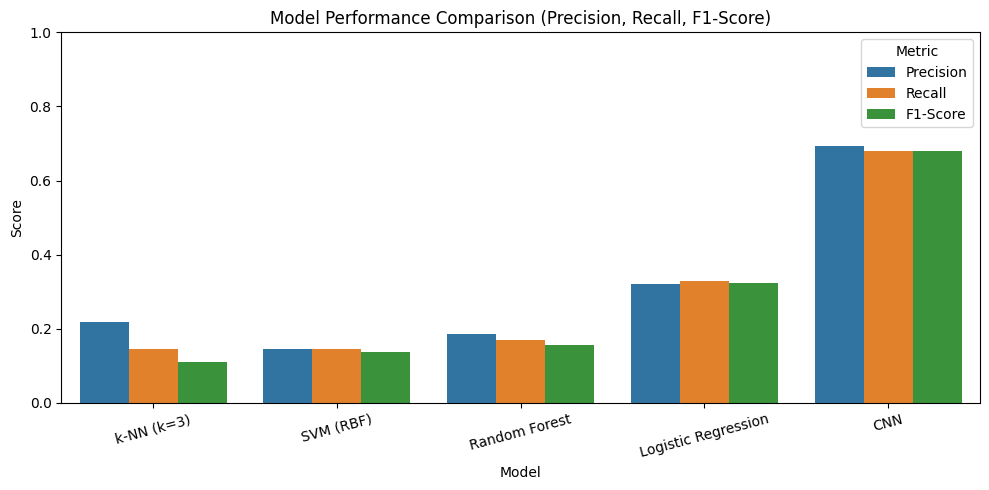

,Precision,Recall,F1-Score
k-NN (k=3),0.217,0.144,0.111
SVM (RBF),0.145,0.144,0.138
Random Forest,0.187,0.170,0.157
Logistic Regression,0.321,0.328,0.322
CNN,0.694,0.679,0.680


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# === Step 1: Helper to extract avg metrics ===
def extract_scores(y_true, y_pred, model_name, results_dict):
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    results_dict[model_name] = [
        round(report["macro avg"]["precision"], 3),
        round(report["macro avg"]["recall"], 3),
        round(report["macro avg"]["f1-score"], 3)
    ]

# === Step 2: Run for each model ===
results = {}

# k-NN
y_pred_knn = knn.predict(X_test)
extract_scores(y_test_split, y_pred_knn, "k-NN (k=3)", results)

# SVM
y_pred_svm = svm.predict(X_test)
extract_scores(y_test_split, y_pred_svm, "SVM (RBF)", results)

# Random Forest
y_pred_rf = rf.predict(X_test)
extract_scores(y_test_split, y_pred_rf, "Random Forest", results)

# Logistic Regression
y_pred_logreg = logreg.predict(X_test)
extract_scores(y_test_split, y_pred_logreg, "Logistic Regression", results)

# CNN
y_pred_cnn = model.predict(x_test)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)
y_true_cnn_classes = np.argmax(y_test_cat, axis=1)
extract_scores(y_true_cnn_classes, y_pred_cnn_classes, "CNN", results)

# === Step 3: Visualize results ===
df = pd.DataFrame(results, index=["Precision", "Recall", "F1-Score"]).T

plt.figure(figsize=(10, 5))
sns.barplot(data=df.reset_index().melt(id_vars="index"), x="index", y="value", hue="variable")
plt.title("Model Performance Comparison (Precision, Recall, F1-Score)")
plt.xlabel("Model")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

# Optional: view data
df
